Loading EDX dataset...
Indexing data in /project/haix/isee/nwen/arl_edx_chromagan ...
Dataset loaded successfully! Total samples: 45
Exploring dataset structure...
EDX Dataset Overview:
Total samples: 45
Unique label combinations: 9
\nAvailable label combinations (Fe%, Laser Speed):
  1. Fe: 0.2%, Laser Speed: 0.5
  2. Fe: 0.2%, Laser Speed: 0.7
  3. Fe: 0.2%, Laser Speed: 1.0
  4. Fe: 0.4%, Laser Speed: 0.5
  5. Fe: 0.4%, Laser Speed: 0.7
  6. Fe: 0.4%, Laser Speed: 1.0
  7. Fe: 0.5%, Laser Speed: 0.5
  8. Fe: 0.5%, Laser Speed: 0.7
  9. Fe: 0.5%, Laser Speed: 1.0

Visualizing first 4 samples for comparison:


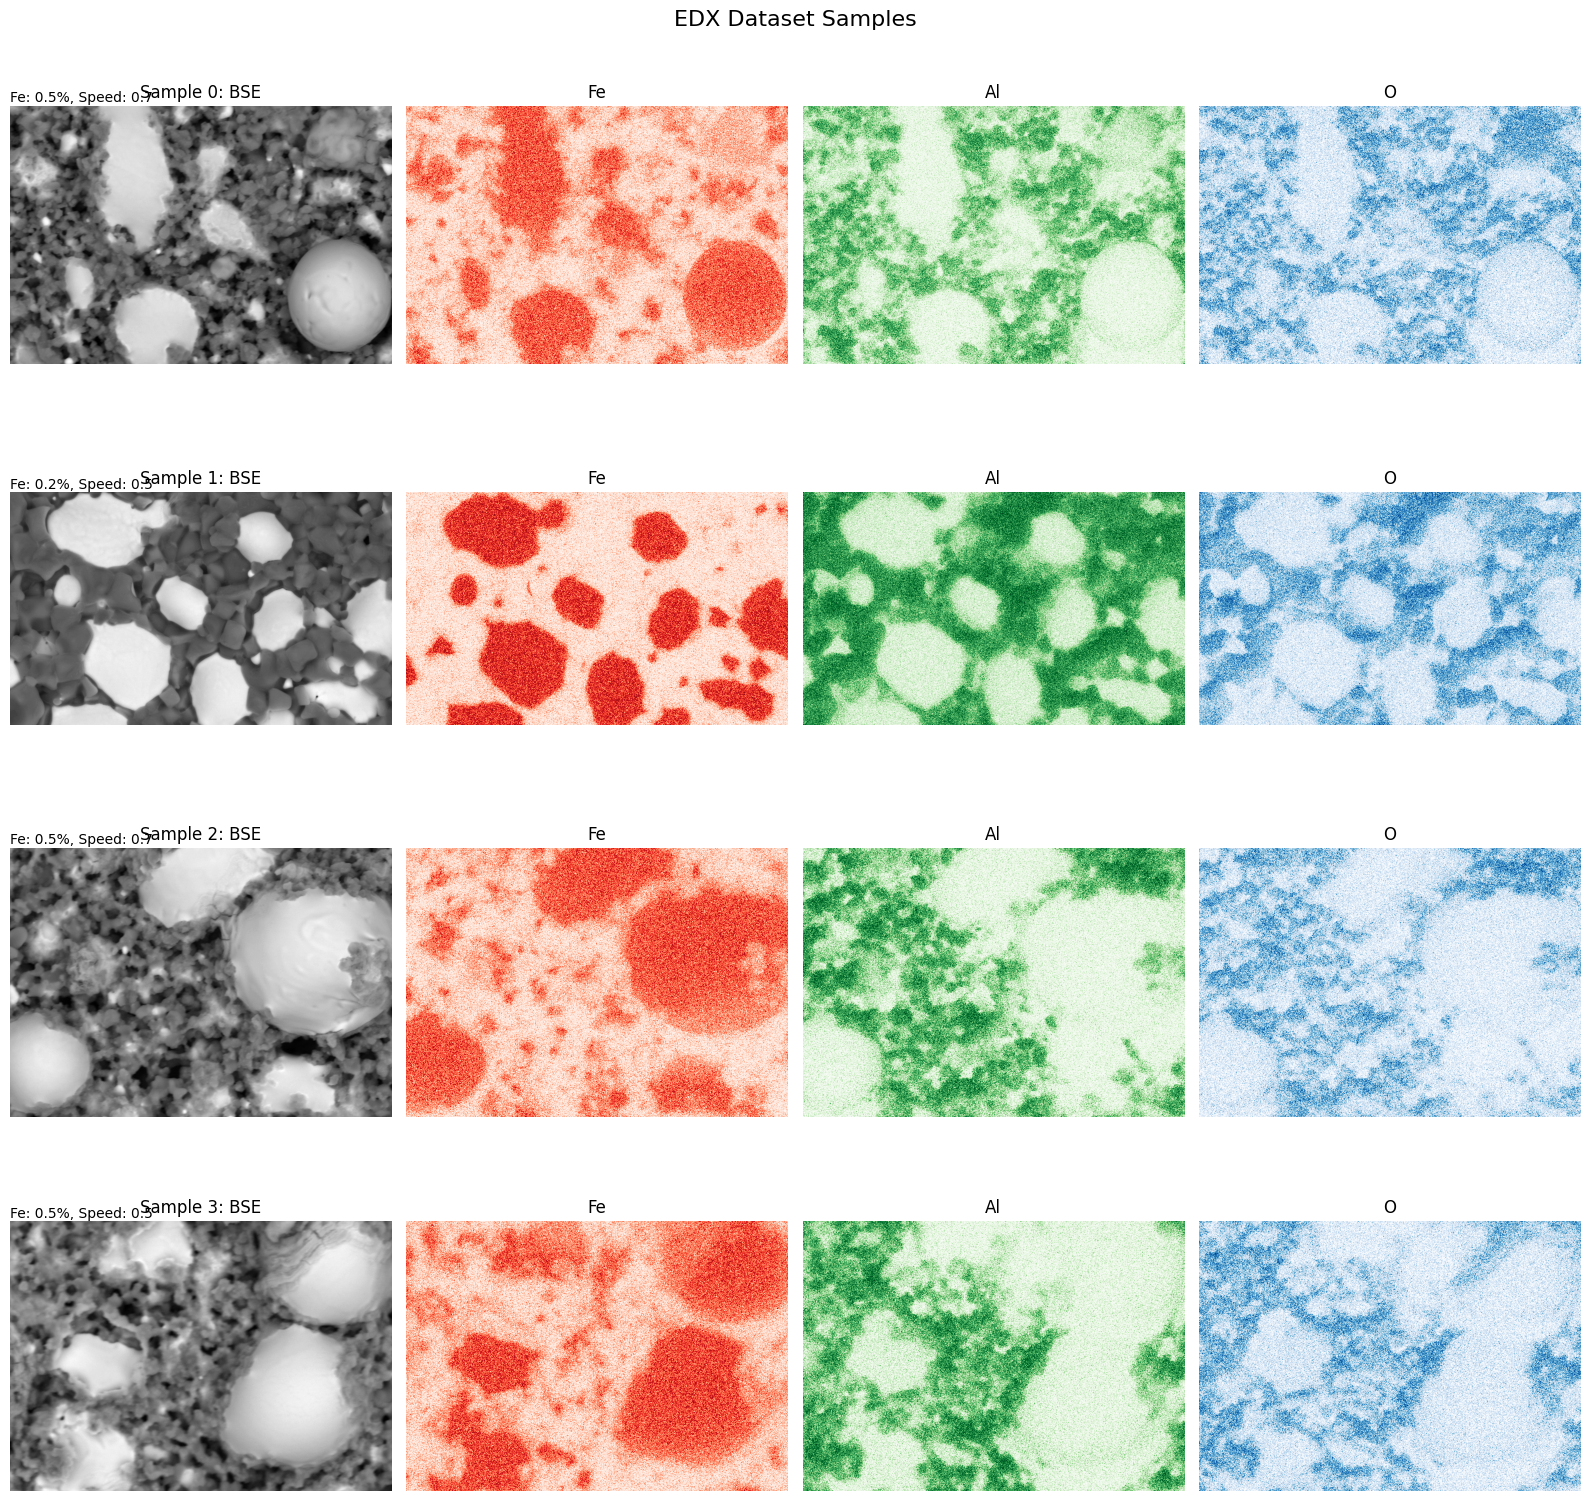

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import torchvision.transforms as transforms

# Add the current directory to the path to import the data modules
sys.path.append('.')
from data.dataset import ArlFeAl2O3EdxDataset

# Set up the dataset
def load_edx_dataset(data_dir='./data', split='train'):
    """Load the EDX dataset without transforms for visualization."""
    dataset = ArlFeAl2O3EdxDataset(
        root=data_dir,
        split=split,
        train_ratio=1.0,
        val_ratio=0.0,
        test_ratio=0.0,
        discriminative=True,
        transform=None,  # No transforms to keep PIL images for visualization
        seed=42
    )
    return dataset

# Additional utility functions for dataset exploration

def explore_dataset_info(dataset):
    """Provide overview of the dataset."""
    print("EDX Dataset Overview:")
    print("=" * 50)
    print(f"Total samples: {len(dataset)}")
    
    # Collect all unique labels
    labels = []
    for i in range(len(dataset)):
        _, _, label = dataset[i]
        if label not in labels:
            labels.append(label)
    
    print(f"Unique label combinations: {len(labels)}")
    print("\\nAvailable label combinations (Fe%, Laser Speed):")
    for i, label in enumerate(sorted(labels)):
        print(f"  {i+1}. Fe: {label[0]}%, Laser Speed: {label[1]}")
    
    return labels

def visualize_multiple_samples(dataset, indices=[0, 1, 2, 3]):
    """Visualize multiple samples in a grid."""
    n_samples = len(indices)
    fig, axes = plt.subplots(n_samples, 4, figsize=(16, 4*n_samples))
    
    if n_samples == 1:
        axes = axes.reshape(1, -1)
    
    for i, idx in enumerate(indices):
        if idx >= len(dataset):
            print(f"Index {idx} is out of range. Skipping.")
            continue
            
        bse_img, edx_rgb_img, label = dataset[idx]
        edx_array = np.array(edx_rgb_img)
        
        # BSE
        axes[i, 0].imshow(bse_img, cmap='gray')
        axes[i, 0].set_title(f'Sample {idx}: BSE')
        axes[i, 0].axis('off')
        
        # Fe
        axes[i, 1].imshow(edx_array[:, :, 0], cmap='Reds')
        axes[i, 1].set_title(f'Fe')
        axes[i, 1].axis('off')
        
        # Al  
        axes[i, 2].imshow(edx_array[:, :, 1], cmap='Greens')
        axes[i, 2].set_title(f'Al')
        axes[i, 2].axis('off')
        
        # O
        axes[i, 3].imshow(edx_array[:, :, 2], cmap='Blues')
        axes[i, 3].set_title(f'O')
        axes[i, 3].axis('off')
        
        # Add label info as subplot title
        fe_percent, laser_speed = label
        fig.suptitle(f'EDX Dataset Samples', fontsize=16)
        axes[i, 0].text(0, -10, f'Fe: {fe_percent}%, Speed: {laser_speed}', 
                       transform=axes[i, 0].transData, fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Load the dataset
print("Loading EDX dataset...")
dataset = load_edx_dataset()
print(f"Dataset loaded successfully! Total samples: {len(dataset)}")

# Explore dataset information
print("Exploring dataset structure...")
unique_labels = explore_dataset_info(dataset)

print("\n" + "=" * 50)
print("Visualizing first 4 samples for comparison:")
visualize_multiple_samples(dataset, [0, 1, 2, 3])



Creating comprehensive density maps for sample 0...


ValueError: 'fes' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

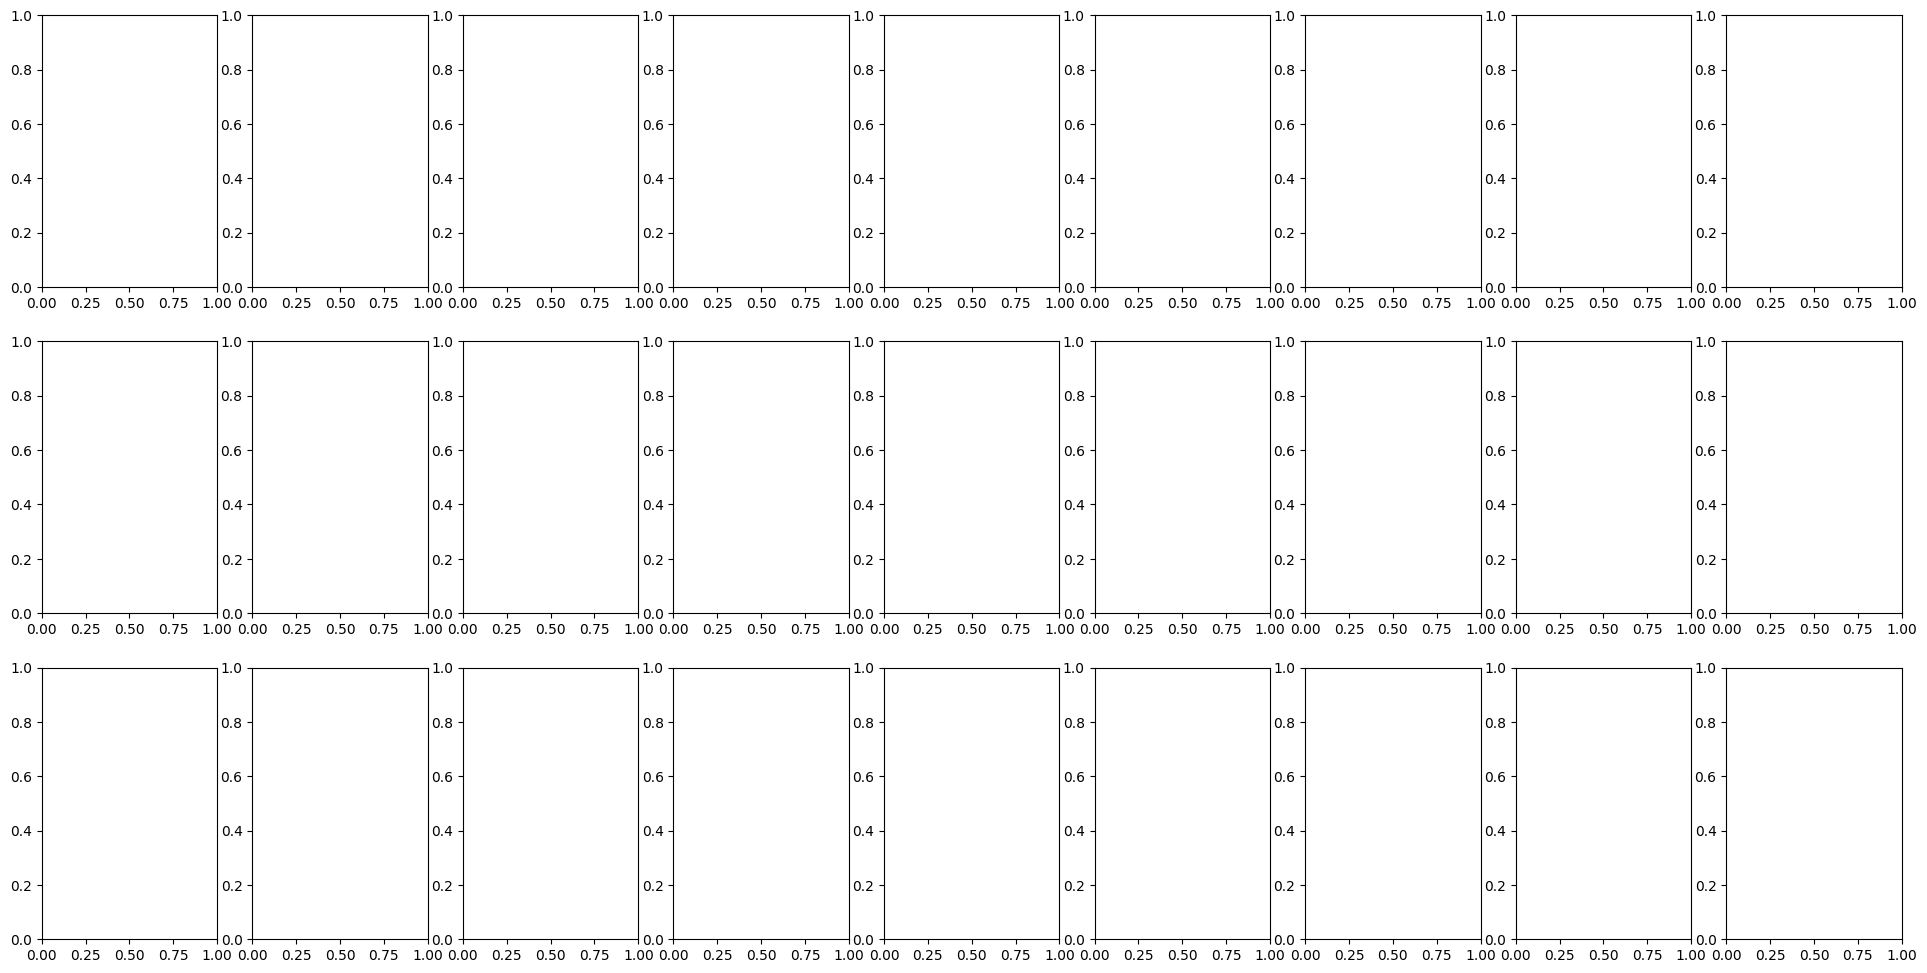

In [2]:
import cv2
from scipy import ndimage
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans
from skimage import filters, morphology, feature
from skimage.segmentation import watershed
import seaborn as sns

def create_density_maps(edx_channel, algorithm='gaussian_blur'):
    """
    Create density maps using different algorithms.
    
    Args:
        edx_channel: 2D numpy array of EDX channel data
        algorithm: String specifying the algorithm to use
    
    Returns:
        2D numpy array representing the density map
    """
    
    if algorithm == 'gaussian_blur':
        # Gaussian blur for smooth density estimation
        return cv2.GaussianBlur(edx_channel.astype(np.float32), (15, 15), 0)
    
    elif algorithm == 'histogram_equalization':
        # Histogram equalization to enhance contrast
        return cv2.equalizeHist(edx_channel.astype(np.uint8)).astype(np.float32)
    
    elif algorithm == 'morphological_closing':
        # Morphological closing to fill gaps and create density regions
        kernel = np.ones((5,5), np.uint8)
        return cv2.morphologyEx(edx_channel.astype(np.uint8), cv2.MORPH_CLOSE, kernel).astype(np.float32)
    
    elif algorithm == 'laplacian_filter':
        # Laplacian filter for edge-based density
        laplacian = cv2.Laplacian(edx_channel.astype(np.float32), cv2.CV_64F)
        return np.abs(laplacian)
    
    elif algorithm == 'bilateral_filter':
        # Bilateral filter for noise reduction while preserving edges
        return cv2.bilateralFilter(edx_channel.astype(np.uint8), 9, 75, 75).astype(np.float32)
    
    elif algorithm == 'sobel_magnitude':
        # Sobel edge detection magnitude
        sobelx = cv2.Sobel(edx_channel.astype(np.float32), cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(edx_channel.astype(np.float32), cv2.CV_64F, 0, 1, ksize=3)
        return np.sqrt(sobelx**2 + sobely**2)
    
    elif algorithm == 'median_filter':
        # Median filter for noise reduction
        return cv2.medianBlur(edx_channel.astype(np.uint8), 5).astype(np.float32)
    
    elif algorithm == 'adaptive_threshold':
        # Adaptive thresholding for local density estimation
        adaptive = cv2.adaptiveThreshold(edx_channel.astype(np.uint8), 255, 
                                       cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
        return adaptive.astype(np.float32)
    
    else:
        return edx_channel.astype(np.float32)

def visualize_density_maps_comprehensive(dataset, sample_idx=0):
    """
    Visualize comprehensive density maps for all EDX channels using 8 different algorithms.
    """
    
    # Get sample data
    bse_img, edx_rgb_img, label = dataset[sample_idx]
    edx_array = np.array(edx_rgb_img)
    
    # Extract individual channels
    fe_channel = edx_array[:, :, 0]
    al_channel = edx_array[:, :, 1]
    o_channel = edx_array[:, :, 2]
    
    channels = {'Fe': fe_channel, 'Al': al_channel, 'O': o_channel}
    
    # Define algorithms
    algorithms = [
        'gaussian_blur',
        'histogram_equalization', 
        'morphological_closing',
        'laplacian_filter',
        'bilateral_filter',
        'sobel_magnitude',
        'median_filter',
        'adaptive_threshold'
    ]
    
    # Create comprehensive visualization
    fig, axes = plt.subplots(len(channels), len(algorithms) + 1, figsize=(24, 12))
    
    for i, (channel_name, channel_data) in enumerate(channels.items()):
        
        # Plot original channel
        im0 = axes[i, 0].imshow(channel_data, cmap=f'{channel_name.lower()}s' if channel_name != 'O' else 'Blues')
        axes[i, 0].set_title(f'Original {channel_name}')
        axes[i, 0].axis('off')
        plt.colorbar(im0, ax=axes[i, 0], fraction=0.046, pad=0.04)
        
        # Plot density maps for each algorithm
        for j, algorithm in enumerate(algorithms):
            density_map = create_density_maps(channel_data, algorithm)
            
            im = axes[i, j+1].imshow(density_map, cmap='viridis')
            axes[i, j+1].set_title(f'{algorithm.replace("_", " ").title()}')
            axes[i, j+1].axis('off')
            plt.colorbar(im, ax=axes[i, j+1], fraction=0.046, pad=0.04)
    
    # Add overall title
    fe_percent, laser_speed = label
    fig.suptitle(f'EDX Density Maps - Sample {sample_idx} (Fe: {fe_percent}%, Speed: {laser_speed})', 
                 fontsize=16, y=0.98)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.94)
    plt.show()

# Visualize density maps for the first sample
print("Creating comprehensive density maps for sample 0...")
visualize_density_maps_comprehensive(dataset, sample_idx=0)